In [28]:
import pandas as pd
import numpy as np
import tabletex as tb
from scipy.optimize import curve_fit
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [13]:
data123 = pd.read_csv('Helium.tsv', delimiter='\t')
data123

,"$t_1, s$","$V_1, mV$","$t_2, s$","$V_2, mV$"
0,8,19.70,4,21.30
1,18,18.45,13,20.33
2,27,17.40,22,19.43
3,37,16.31,32,18.49
4,47,15.29,42,17.60
5,57,14.32,52,16.74
6,67,13.41,61,16.04
7,77,12.56,70,15.33
8,87,11.78,80,14.59
9,97,11.02,90,13.88


In [14]:
data123['$t_3, s$'] = np.array([4,13,22,31,41,51,61,70,79,89,99,109,119,129,139,149,159,169,179,189])
data123

,"$t_1, s$","$V_1, mV$","$t_2, s$","$V_2, mV$","$t_3, s$"
0,8,19.70,4,21.30,4
1,18,18.45,13,20.33,13
2,27,17.40,22,19.43,22
3,37,16.31,32,18.49,31
4,47,15.29,42,17.60,41
5,57,14.32,52,16.74,51
6,67,13.41,61,16.04,61
7,77,12.56,70,15.33,70
8,87,11.78,80,14.59,79
9,97,11.02,90,13.88,89


In [15]:
data123['$V_3, mV$'] = np.array([16.27,15.66,15.07,14.53,13.96,13.39,12.85,12.39,11.96,11.47,11.02,10.57,10.15,9.75,9.36,8.97,8.61,8.26,7.92,7.59])
data123

,"$t_1, s$","$V_1, mV$","$t_2, s$","$V_2, mV$","$t_3, s$","$V_3, mV$"
0,8,19.70,4,21.30,4,16.27
1,18,18.45,13,20.33,13,15.66
2,27,17.40,22,19.43,22,15.07
3,37,16.31,32,18.49,31,14.53
4,47,15.29,42,17.60,41,13.96
5,57,14.32,52,16.74,51,13.39
6,67,13.41,61,16.04,61,12.85
7,77,12.56,70,15.33,70,12.39
8,87,11.78,80,14.59,79,11.96
9,97,11.02,90,13.88,89,11.47


In [16]:
data123['$ln(V_1)$'] = data123['$V_1, mV$'].apply(np.log)
data123['$ln(V_2)$'] = data123['$V_2, mV$'].apply(np.log)
data123['$ln(V_3)$'] = data123['$V_3, mV$'].apply(np.log)
data123

,"$t_1, s$","$V_1, mV$","$t_2, s$","$V_2, mV$","$t_3, s$","$V_3, mV$",$ln(V_1)$,$ln(V_2)$,$ln(V_3)$
0,8,19.70,4,21.30,4,16.27,2.980619,3.058707,2.789323
1,18,18.45,13,20.33,13,15.66,2.915064,3.012098,2.751110
2,27,17.40,22,19.43,22,15.07,2.856470,2.966818,2.712706
3,37,16.31,32,18.49,31,14.53,2.791778,2.917230,2.676215
4,47,15.29,42,17.60,41,13.96,2.727199,2.867899,2.636196
5,57,14.32,52,16.74,51,13.39,2.661657,2.817801,2.594508
6,67,13.41,61,16.04,61,12.85,2.596001,2.775086,2.553344
7,77,12.56,70,15.33,70,12.39,2.530517,2.729812,2.516890
8,87,11.78,80,14.59,79,11.96,2.466403,2.680336,2.481568
9,97,11.02,90,13.88,89,11.47,2.399712,2.630449,2.439735


In [17]:
data123 = round(data123, 3)

In [18]:
tb.table(data123)

\begin{tabular}{rrrrrrrrr}\\
$t_1, s$ & $V_1, mV$ & $t_2, s$ & $V_2, mV$ & $t_3, s$ & $V_3, mV$ & $ln(V_1)$ & $ln(V_2)$ & $ln(V_3)$ & \\ \hline
$8.0$ & $19.7$ & $4.0$ & $21.3$ & $4.0$ & $16.27$ & $2.981$ & $3.059$ & $2.789$ \\
$18.0$ & $18.45$ & $13.0$ & $20.33$ & $13.0$ & $15.66$ & $2.915$ & $3.012$ & $2.751$ \\
$27.0$ & $17.4$ & $22.0$ & $19.43$ & $22.0$ & $15.07$ & $2.856$ & $2.967$ & $2.713$ \\
$37.0$ & $16.31$ & $32.0$ & $18.49$ & $31.0$ & $14.53$ & $2.792$ & $2.917$ & $2.676$ \\
$47.0$ & $15.29$ & $42.0$ & $17.6$ & $41.0$ & $13.96$ & $2.727$ & $2.868$ & $2.636$ \\
$57.0$ & $14.32$ & $52.0$ & $16.74$ & $51.0$ & $13.39$ & $2.662$ & $2.818$ & $2.595$ \\
$67.0$ & $13.41$ & $61.0$ & $16.04$ & $61.0$ & $12.85$ & $2.596$ & $2.775$ & $2.553$ \\
$77.0$ & $12.56$ & $70.0$ & $15.33$ & $70.0$ & $12.39$ & $2.531$ & $2.73$ & $2.517$ \\
$87.0$ & $11.78$ & $80.0$ & $14.59$ & $79.0$ & $11.96$ & $2.466$ & $2.68$ & $2.482$ \\
$97.0$ & $11.02$ & $90.0$ & $13.88$ & $89.0$ & $11.47$ & $2.4$ & $2.63$ &

In [19]:
data456 = pd.read_csv('Helium2.tsv', delimiter='\t')
data456

,"$t_4, s$"
0,8
1,22
2,32
3,47
4,57
5,72
6,86
7,100
8,115
9,130


In [20]:
data456['$V_4, mV$'] = np.array([19.6,18.8,18.28,17.49,17,16.27,15.63,15,14.37,13.75,13.16,12.6,12.06,11.55,11.08,10.6,10.14,9.7,9.15,8.6])
data456['$t_5, s$'] = np.array([5,21,44,64,87,102,123,145,168,188,205,221,243,262,284,300,324,342,360,380])
data456['$V_5, mV$'] = np.array([17.16,16.49,15.64,14.88,14.1,13.62,12.96,12.32,11.7,11.15,10.69,10.32,9.78,9.36,8.87,8.54,8.06,7.7,7.37,7])
data456['$t_6, s$'] = np.array([3,18,33,46,65,80,93,114,127,142,155,171,190,208,229,240,258,272,296,327])
data456['$V_6, mV$'] = np.array([17,16.63,16.2,15.84,15.3,14.87,14.55,14,13.66,13.31,12.98,12.61,12.17,11.77,11.32,11.08,10.7,10.41,9.97,9.38])
data456

,"$t_4, s$","$V_4, mV$","$t_5, s$","$V_5, mV$","$t_6, s$","$V_6, mV$"
0,8,19.60,5,17.16,3,17.00
1,22,18.80,21,16.49,18,16.63
2,32,18.28,44,15.64,33,16.20
3,47,17.49,64,14.88,46,15.84
4,57,17.00,87,14.10,65,15.30
5,72,16.27,102,13.62,80,14.87
6,86,15.63,123,12.96,93,14.55
7,100,15.00,145,12.32,114,14.00
8,115,14.37,168,11.70,127,13.66
9,130,13.75,188,11.15,142,13.31


In [22]:
data456['$ln(V_4)$'] = data456['$V_4, mV$'].apply(np.log)
data456['$ln(V_5)$'] = data456['$V_5, mV$'].apply(np.log)
data456['$ln(V_6)$'] = data456['$V_6, mV$'].apply(np.log)
data456

,"$t_4, s$","$V_4, mV$","$t_5, s$","$V_5, mV$","$t_6, s$","$V_6, mV$",$ln(V_4)$,$ln(V_5)$,$ln(V_6)$
0,8,19.60,5,17.16,3,17.00,2.975530,2.842581,2.833213
1,22,18.80,21,16.49,18,16.63,2.933857,2.802754,2.811208
2,32,18.28,44,15.64,33,16.20,2.905808,2.749832,2.785011
3,47,17.49,64,14.88,46,15.84,2.861629,2.700018,2.762538
4,57,17.00,87,14.10,65,15.30,2.833213,2.646175,2.727853
5,72,16.27,102,13.62,80,14.87,2.789323,2.611539,2.699346
6,86,15.63,123,12.96,93,14.55,2.749192,2.561868,2.677591
7,100,15.00,145,12.32,114,14.00,2.708050,2.511224,2.639057
8,115,14.37,168,11.70,127,13.66,2.665143,2.459589,2.614472
9,130,13.75,188,11.15,142,13.31,2.621039,2.411439,2.588516


In [24]:
data456 = round(data456, 3)

In [25]:
tb.table(data456)

\begin{tabular}{rrrrrrrrr}\\
$t_4, s$ & $V_4, mV$ & $t_5, s$ & $V_5, mV$ & $t_6, s$ & $V_6, mV$ & $ln(V_4)$ & $ln(V_5)$ & $ln(V_6)$ & \\ \hline
$8.0$ & $19.6$ & $5.0$ & $17.16$ & $3.0$ & $17.0$ & $2.976$ & $2.843$ & $2.833$ \\
$22.0$ & $18.8$ & $21.0$ & $16.49$ & $18.0$ & $16.63$ & $2.934$ & $2.803$ & $2.811$ \\
$32.0$ & $18.28$ & $44.0$ & $15.64$ & $33.0$ & $16.2$ & $2.906$ & $2.75$ & $2.785$ \\
$47.0$ & $17.49$ & $64.0$ & $14.88$ & $46.0$ & $15.84$ & $2.862$ & $2.7$ & $2.763$ \\
$57.0$ & $17.0$ & $87.0$ & $14.1$ & $65.0$ & $15.3$ & $2.833$ & $2.646$ & $2.728$ \\
$72.0$ & $16.27$ & $102.0$ & $13.62$ & $80.0$ & $14.87$ & $2.789$ & $2.612$ & $2.699$ \\
$86.0$ & $15.63$ & $123.0$ & $12.96$ & $93.0$ & $14.55$ & $2.749$ & $2.562$ & $2.678$ \\
$100.0$ & $15.0$ & $145.0$ & $12.32$ & $114.0$ & $14.0$ & $2.708$ & $2.511$ & $2.639$ \\
$115.0$ & $14.37$ & $168.0$ & $11.7$ & $127.0$ & $13.66$ & $2.665$ & $2.46$ & $2.614$ \\
$130.0$ & $13.75$ & $188.0$ & $11.15$ & $142.0$ & $13.31$ & $2.621$ & $2.

In [31]:
def f(x, a, b):
    return a*x+b

In [35]:
popt1, pcov1 = curve_fit(f, data123['$t_1, s$'], data123['$ln(V_1)$'])
popt2, pcov2 = curve_fit(f, data123['$t_2, s$'], data123['$ln(V_2)$'])
popt3, pcov3 = curve_fit(f, data123['$t_3, s$'], data123['$ln(V_3)$'])
popt4, pcov4 = curve_fit(f, data456['$t_4, s$'], data456['$ln(V_4)$'])
popt5, pcov5 = curve_fit(f, data456['$t_5, s$'], data456['$ln(V_5)$'])
popt6, pcov6 = curve_fit(f, data456['$t_6, s$'], data456['$ln(V_6)$'])
print(popt1, popt2, popt3, popt4, popt5, popt6)

[-0.00671491  3.04348557] [-0.00499009  3.07845049] [-0.00410082  2.8044833 ] [ -2.90816357e-03   2.99900157e+00] [ -2.37398958e-03   2.85492958e+00] [ -1.84186664e-03   2.84670025e+00]


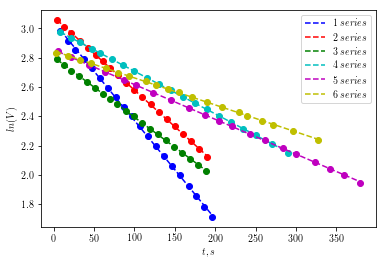

In [54]:
plot(data123['$t_1, s$'], data123['$ln(V_1)$'], 'bo', label='')
plot(data123['$t_1, s$'], f(data123['$t_1, s$'], popt1[0], popt1[1]), 'b--', label='$1\, series$')
plot(data123['$t_2, s$'], data123['$ln(V_2)$'], 'ro', label='')
plot(data123['$t_2, s$'], f(data123['$t_2, s$'], popt2[0], popt2[1]), 'r--', label='$2\, series$')
plot(data123['$t_3, s$'], data123['$ln(V_3)$'], 'go', label='')
plot(data123['$t_3, s$'], f(data123['$t_3, s$'], popt3[0], popt3[1]), 'g--', label='$3\, series$')
plot(data456['$t_4, s$'], data456['$ln(V_4)$'], 'co', label='')
plot(data456['$t_4, s$'], f(data456['$t_4, s$'], popt4[0], popt4[1]), 'c--', label='$4\, series$')
plot(data456['$t_5, s$'], data456['$ln(V_5)$'], 'mo', label='')
plot(data456['$t_5, s$'], f(data456['$t_5, s$'], popt5[0], popt5[1]), 'm--', label='$5\, series$')
plot(data456['$t_6, s$'], data456['$ln(V_6)$'], 'yo', label='')
plot(data456['$t_6, s$'], f(data456['$t_6, s$'], popt6[0], popt6[1]), 'y--', label='$6\, series$')
legend()
xlabel('$t, s$')
ylabel('$ln(V)$')
savefig('tension.png', figsize=(40,20))

In [77]:
data = pd.DataFrame()

In [78]:
data['$\\tau, s$'] = -1.0/np.array([popt1[0],popt2[0],popt3[0],popt4[0],popt5[0],popt6[0]])

In [79]:
data['$D, \\frac {cm^2} s$'] = 0.5 * 775 * 5.3 / data['$\\tau, s$']

In [80]:
data['$P_{\\Sigma}, kPa$'] = np.array([4.5, 7, 8.5, 11, 13, 19.5])

In [81]:
data['$1/P_{\\Sigma}, kPa^{-1}$'] = 1.0/data['$P_{\\Sigma}, kPa$']

In [82]:
data

,"$\tau, s$","$D, \frac {cm^2} s$","$P_{\Sigma}, kPa$","$1/P_{\Sigma}, kPa^{-1}$"
0,148.922216,13.790756,4.5,0.222222
1,200.397243,10.248395,7.0,0.142857
2,243.853443,8.422067,8.5,0.117647
3,343.859613,5.972641,11.0,0.090909
4,421.231841,4.875581,13.0,0.076923
5,542.927471,3.782734,19.5,0.051282


In [83]:
popt, pcov = curve_fit(f, data['$1/P_{\\Sigma}, kPa^{-1}$'], data['$D, \\frac {cm^2} s$'])

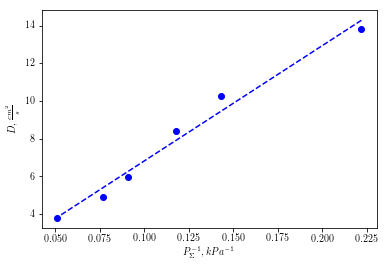

In [90]:
plot(data['$1/P_{\\Sigma}, kPa^{-1}$'], data['$D, \\frac {cm^2} s$'], 'bo', label='')
plot(data['$1/P_{\\Sigma}, kPa^{-1}$'], f(data['$1/P_{\\Sigma}, kPa^{-1}$'], popt[0], popt[1]), 'b--')
xlabel('$P_{\\Sigma}^{-1}, kPa^{-1}$')
ylabel('$D, \\frac {cm^2} s$')
savefig('diff.png', figsize=(40,20))

In [85]:
print(popt, pcov)

[ 61.20879696   0.68889199] [[ 21.1360641   -2.47235821]
 [ -2.47235821   0.35382896]]


In [88]:
data = round(data, 3)

In [89]:
tb.table(data)

\begin{tabular}{rrrr}\\
$\tau, s$ & $D, \frac {cm^2} s$ & $P_{\Sigma}, kPa$ & $1/P_{\Sigma}, kPa^{-1}$ & \\ \hline
$148.922$ & $13.791$ & $4.5$ & $0.222$ \\
$200.397$ & $10.248$ & $7.0$ & $0.143$ \\
$243.853$ & $8.422$ & $8.5$ & $0.118$ \\
$343.86$ & $5.973$ & $11.0$ & $0.091$ \\
$421.232$ & $4.876$ & $13.0$ & $0.077$ \\
$542.927$ & $3.783$ & $19.5$ & $0.051$ \\
\end{tabular}
